법정가축전염병 발생통계
1995 59
1996 393
1997 260
1998 230
1999 48
2000 21,549
2001 27,787
2002 30,155
2003 48,657
2004 15,833
2005 10,862
2006 18,608
2007 15,682
2008 13,857
2009 9,717
2010 4,573
2011 1,342
2012 1,454
2013 5,474
2014 36,108
2015 18,988
2016 9,610
2017 7,586
2018 35,078
2019 29,342
2020 4,679
2021 5,791
2022 21,351
2023 9,026


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46076 (\N{HANGUL SYLLABLE DWAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGU

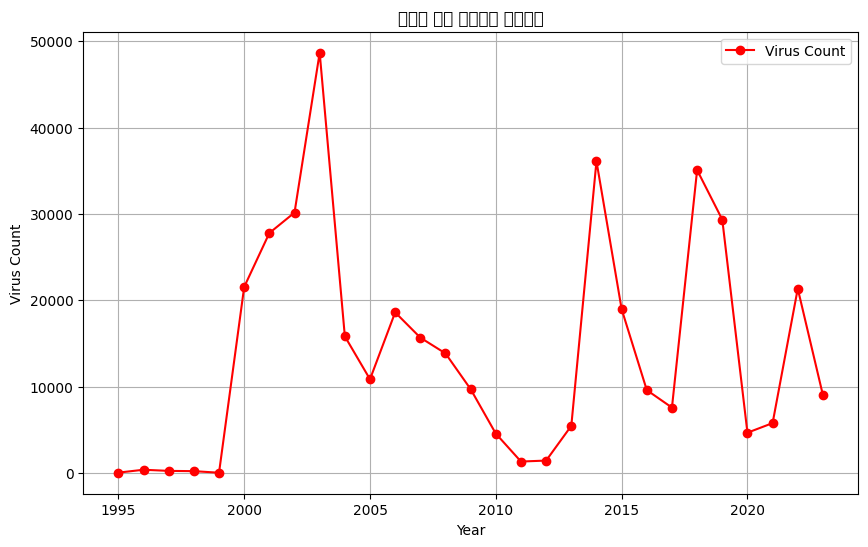

In [3]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import os
import sys
import requests
import urllib
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd

url  = "https://home.kahis.go.kr/home/lkntscrinfo/selectLkntsStats.do"

chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Set up the WebDriver 
#service = Service(executable_path="/Users/sungyoon/Desktop/test_file/chromedriver-mac-arm64/chromedriver") 
service = Service(executable_path="/home/sungyoon/chromedriver-linux64/chromedriver") 
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(url)

time.sleep(3)

print(driver.title)

driver.maximize_window()

element1 = driver.find_element(By.CSS_SELECTOR, "#occrFromDtId")
element1.click()
element1.send_keys("19950101")

element2 = driver.find_element(By.CSS_SELECTOR, "#occrToDtId")
element2.click()
element2.send_keys("20231231")

element3 = driver.find_element(By.CSS_SELECTOR, "#lstkspClId > option:nth-child(10)")
element3.click()

time.sleep(1)
search_btn = driver.find_element(By.CSS_SELECTOR, "#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(1) > tbody > tr > td:nth-child(3) > a > img")
search_btn.click()

for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    print(year, Virus_count.text)

# Create a list to store the data
data = []

# Collect data for each year
for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    data.append({"Year": year, "Virus Count": Virus_count.text})

# Create a DataFrame
df_virus = pd.DataFrame(data)

# Display the DataFrame

driver.quit()

import matplotlib.pyplot as plt

# Ensure Virus Count is numeric for sorting and plotting
df_virus['Virus Count'] = df_virus['Virus Count'].str.replace(',', '').astype(int)

# Sort the DataFrame by Year to ensure correct order
df_virus = df_virus.sort_values(by='Year')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_virus['Year'], df_virus['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

plt.xlabel('Year')
plt.ylabel('Virus Count')
plt.title('연도별 돼지 바이러스 발생통계')
plt.grid(True)
plt.legend()

plt.show()


      연도    도축가
0   1993  2,151
1   1994  2,373
2   1995  2,298
3   1996  2,490
4   1997  2,422
5   1998  2,514
6   1999  3,017
7   2000  2,499
8   2001  2,599
9   2002  2,645
10  2003  2,444
11  2004  3,479
12  2005  3,730
13  2006  3,649
14  2007  3,247
15  2008  4,046
16  2009  4,449
17  2010  4,232
18  2011  5,808
19  2012  3,974
20  2013  3,570
21  2014  4,741
22  2015  4,939
23  2016  4,617
24  2017  4,947
25  2018  4,362
26  2019  3,843
27  2020  4,216
28  2021  4,722
29  2022  5,227
30  2023  5,134
31  2024  5,239


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SY

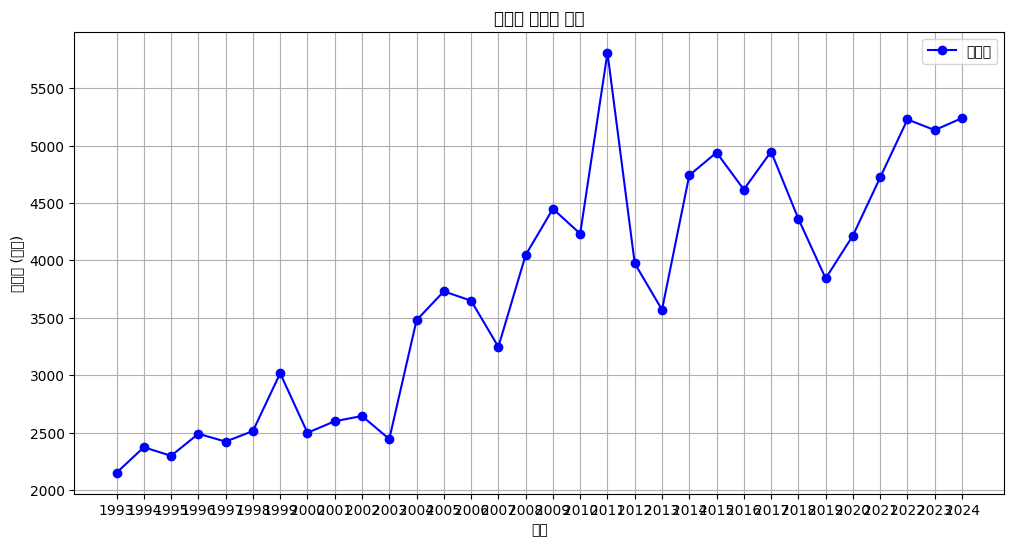

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL
url = "http://www.kmta.or.kr/kr/data/stats_price_year.php"

# 요청
response = requests.get(url)
response.encoding = 'utf-8'

# 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 표 선택
table = soup.select_one("div.contents.p_stats > table")
rows = table.select("tr")

# 연도 및 값 수집
data = []
start_year = 1993
for i, row in enumerate(rows[2:], start=0):  # 헤더 2줄 건너뜀
    if start_year + i > 2024:
        break  # 2024년까지만
    cells = row.find_all("td")
    if len(cells) >= 4:
        value = cells[3].get_text(strip=True)
        year = start_year + i
        data.append({"연도": f"{year}", "도축가": value})

# DataFrame 생성
df_price = pd.DataFrame(data)

# 출력
print(df_price)

import matplotlib.pyplot as plt

# 데이터 변환: 도축가 값을 숫자로 변환
df_price['도축가'] = df_price['도축가'].str.replace(',', '').astype(int)

# 플로우차트 생성
plt.figure(figsize=(12, 6))
plt.plot(df_price['연도'], df_price['도축가'], marker='o', linestyle='-', color='b', label='도축가')

# 그래프 꾸미기
plt.xlabel('연도')
plt.ylabel('도축가 (천원)')
plt.title('연도별 도축가 변화')
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()

/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/32571349.py:34: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/

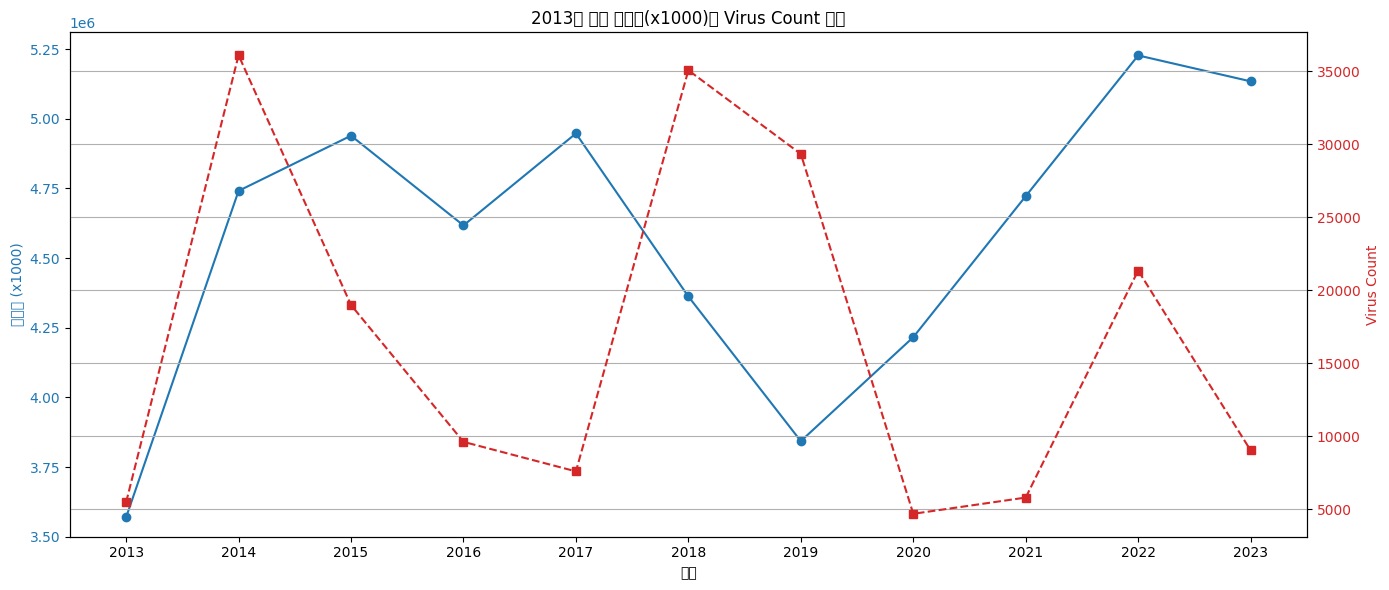

상관계수:
                  도축가  Virus Count
도축가          1.000000    -0.001025
Virus Count -0.001025     1.000000


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# ✅ 2013년 이후 데이터만 선택
df_merged = df_merged[df_merged['연도'] >= 2013]

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])
ax1.set_ylim(bottom=3500 * 1000)  # y축 범위 조절

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('2013년 이후 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


/tmp/ipykernel_48689/4238275182.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_feed = pd.read_sql(query, conn)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/c

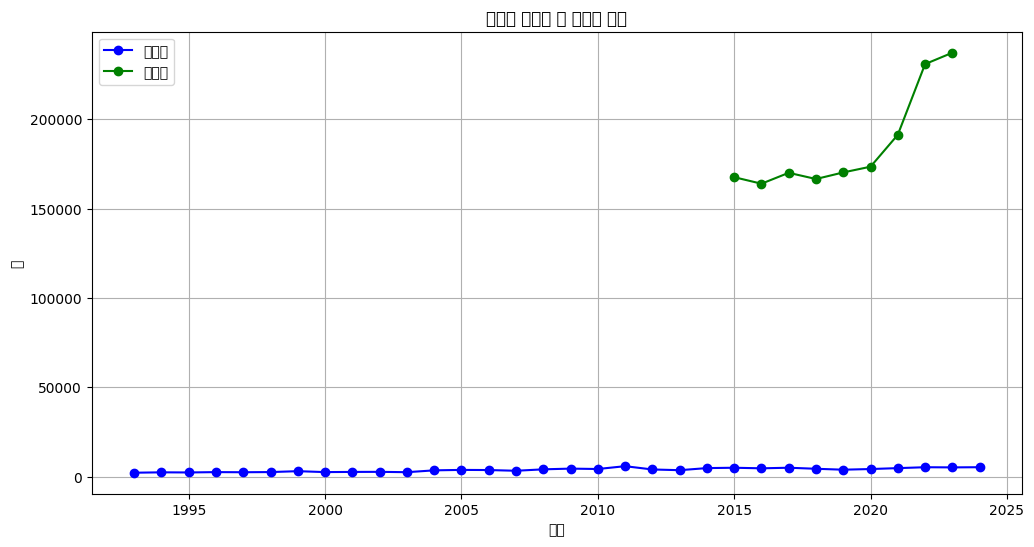

/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SY

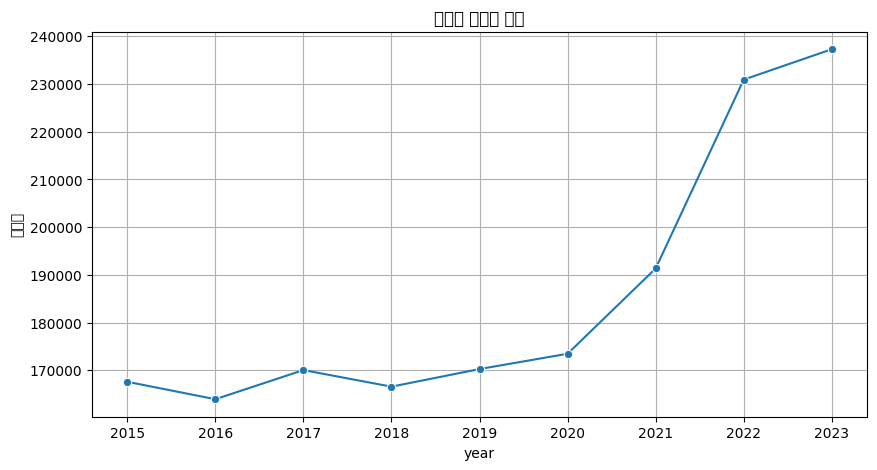

/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_48689/4238275182.py:73: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.t

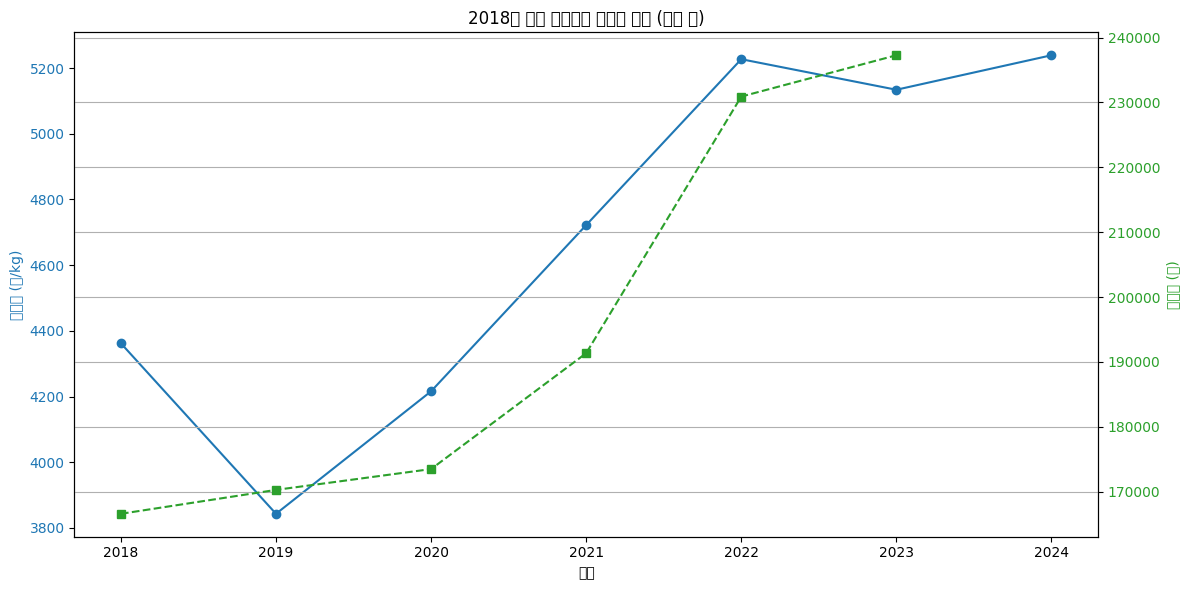

In [7]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ RDS 접속 정보
conn = pymysql.connect(
    host='database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='psy',
    password='0000',
    database='pig',
    charset='utf8mb4'
)

# ✅ feed 테이블 불러오기 (사료비)
query = "SELECT * FROM feed"
df_feed = pd.read_sql(query, conn)

# ✅ 연결 종료
conn.close()

# ✅ 연도별 평균 사료비 계산
yearly_feed = df_feed.groupby('year').mean(numeric_only=True).reset_index()

# ✅ 도축가 전처리
df_price['도축가'] = pd.to_numeric(
    df_price['도축가'].astype(str).str.replace(',', ''), errors='coerce'
)

# ✅ 시각화: 도축가 & 사료비 변화
plt.figure(figsize=(12, 6))
plt.plot(df_price['연도'], df_price['도축가'], marker='o', linestyle='-', color='b', label='도축가')
plt.plot(yearly_feed['year'], yearly_feed['사료비'], marker='o', linestyle='-', color='g', label='사료비')
plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 도축가 및 사료비 변화')
plt.grid(True)
plt.legend()
plt.show()

# ✅ 시각화: 사료비 단독 추이
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_feed, x='year', y='사료비', marker='o')
plt.title('연도별 사료비 추이')
plt.grid(True)
plt.show()

# 2018년 이후 데이터만 필터링
df_price_filtered = df_price[df_price['연도'] >= 2018]
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018]

# 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_price_filtered['연도'], df_price_filtered['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_price_filtered['연도'])

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(yearly_feed_filtered['year'], yearly_feed_filtered['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 꾸미기
plt.title('2018년 이후 도축가와 사료비 변화 (이중 축)')
fig.tight_layout()
plt.grid(True)
plt.show()
